In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태:  torch.Size([1, 28, 28])
label:  5


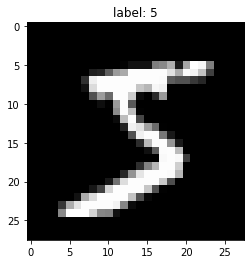

In [5]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:",len(mnist_test))

image, label = mnist_train.__getitem__(0)
print("image data 형태: ", image.size())
print("label: ",label)

img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

In [30]:
batch_size =1024
learning_rate = 0.01
num_epoch = 400

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

[0]
한 번에 로드되는 데이터 크기:  1024


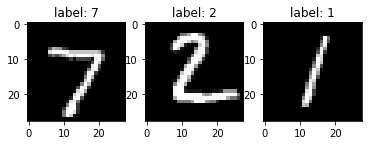

[1]
한 번에 로드되는 데이터 크기:  1024


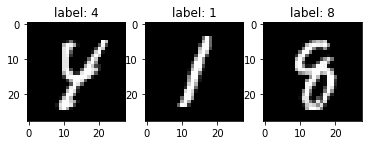

[2]
한 번에 로드되는 데이터 크기:  1024


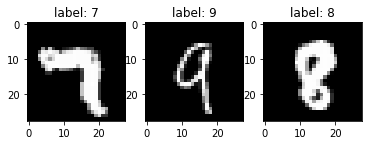

[3]
한 번에 로드되는 데이터 크기:  1024


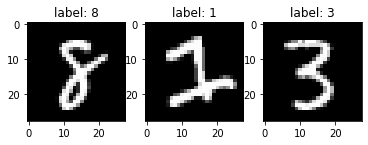

[4]
한 번에 로드되는 데이터 크기:  1024


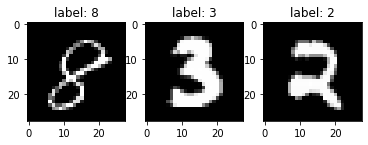

[5]
한 번에 로드되는 데이터 크기:  1024


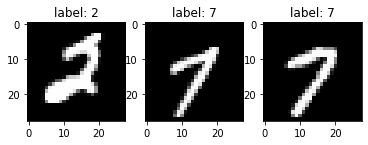

In [8]:
n = 3
for i, (imgs, labels) in enumerate(test_loader):
    if i>5:
      break
    
    print("[%d]" %i)
    print("한 번에 로드되는 데이터 크기: ", len(imgs))

    for j in range(n):
      img = imgs[j].numpy()
      img = img.reshape((img.shape[1], img.shape[2]))

      plt.subplot(1,n,j+1)
      plt.imshow(img, cmap='gray')
      plt.title("label: %d" %labels[j])
    plt.show()

In [32]:
model = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Linear(128,10)
).cuda()

In [21]:
def ComputeAccr(dloader, imodel):
  correct = 0
  total = 0

  for j,(imgs,labels) in enumerate(dloader):
    img = imgs
    label = Variable(labels).cuda()

    img = img.view(-1,img.shape[2]*img.shape[3])
    img = Variable(img, requires_grad=False).cuda()

    output = imodel(img)
    _, output_index = torch.max(output,1)

    total += label.size(0)
    correct +=(output_index == label).sum().float()
  print('Accuracy of Test Data: %f' %(100*correct/total))

In [33]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [34]:
for i in range(num_epoch):
  for j,(imgs, labels) in enumerate(train_loader):
    img = imgs
    label = Variable(labels).cuda()

    img = img.view(-1,img.shape[2]*img.shape[3])
    img = Variable(img, requires_grad=True).cuda()

    optimizer.zero_grad()
    output = model(img)
    loss = loss_func(output, label)

    loss.backward()
    optimizer.step()

  if i%50==0:
    print("%d .."%i)
    ComputeAccr(test_loader, model)
    print(loss)

0 ..
Accuracy of Test Data: 11.295573
tensor(2.2941, device='cuda:0', grad_fn=<NllLossBackward>)
50 ..
Accuracy of Test Data: 80.685768
tensor(0.7318, device='cuda:0', grad_fn=<NllLossBackward>)
100 ..
Accuracy of Test Data: 88.151039
tensor(0.4355, device='cuda:0', grad_fn=<NllLossBackward>)
150 ..
Accuracy of Test Data: 89.843750
tensor(0.3836, device='cuda:0', grad_fn=<NllLossBackward>)
200 ..
Accuracy of Test Data: 90.744362
tensor(0.3380, device='cuda:0', grad_fn=<NllLossBackward>)
250 ..
Accuracy of Test Data: 91.341148
tensor(0.2924, device='cuda:0', grad_fn=<NllLossBackward>)
300 ..
Accuracy of Test Data: 91.710068
tensor(0.3108, device='cuda:0', grad_fn=<NllLossBackward>)
350 ..
Accuracy of Test Data: 91.851128
tensor(0.2957, device='cuda:0', grad_fn=<NllLossBackward>)


In [35]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 92.078995


In [38]:
netname = './nets/mlp_weight.pkl'
torch.save(model, netname)

#model = torch.load(netname)